In [1]:
from dataloader import final_dataset, tensor_to_image
from torch.utils.data import DataLoader
import torchsummary as summary
import matplotlib.pyplot as plt
from model import UNetwork
import numpy as np

In [2]:
final_dataloader = DataLoader(final_dataset, batch_size=8, shuffle=True, num_workers=0)

In [3]:
model = UNetwork()

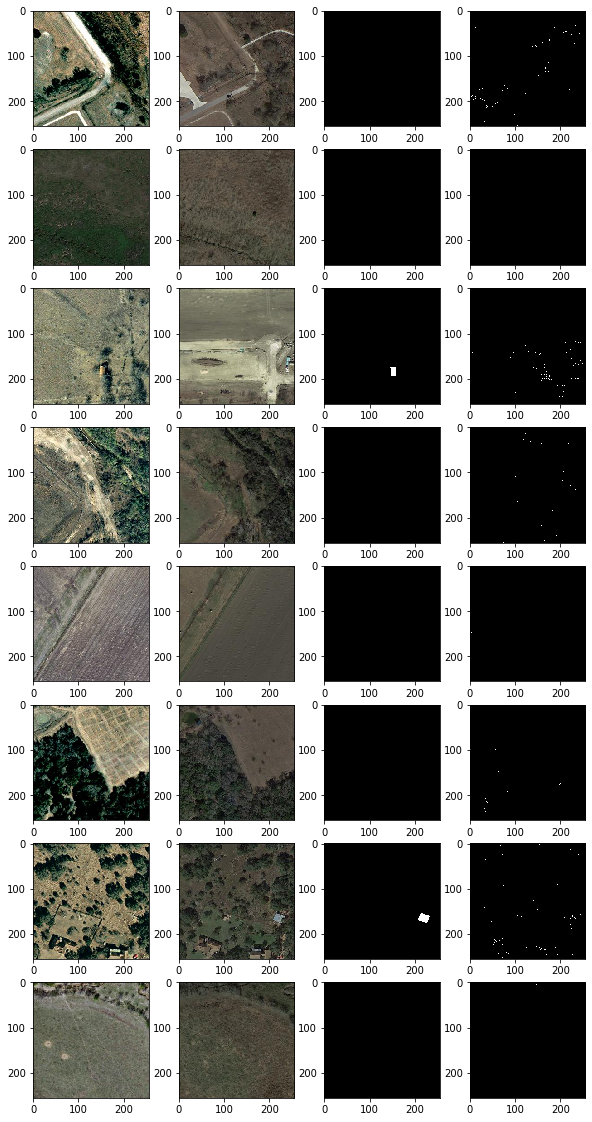

In [4]:
plt.subplots(nrows=8, ncols=4, figsize=(10,20))

for i_batch, sample_batched in enumerate(final_dataloader):

    for i in range(8):
        plt.subplot(8, 4, 4*(i) + 1)
        plt.imshow(tensor_to_image(sample_batched["img_A"][i].detach().clone()))

        plt.subplot(8, 4, 4*(i) + 2)
        plt.imshow(tensor_to_image(sample_batched["img_B"][i].detach().clone()))

        plt.subplot(8, 4, 4*(i) + 3)
        plt.imshow(tensor_to_image(sample_batched["label"][i].detach().clone()), cmap="gray")    


        y_predict = model(sample_batched["img_A"], sample_batched["img_B"])

        plt.subplot(8, 4, 4*(i) + 4)
        plt.imshow(tensor_to_image(y_predict[i].detach().clone()), cmap="gray")  

    model.zero_grad()

    break